In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [3]:
#读取数据
data_m = 'D:\数据分析文档\荣昌母猪\荣昌母猪泌乳期.xlsx'
df_m = pd.read_excel(data_m)

In [4]:
#查看数据
df_m

,1组,组别,Unnamed: 2,产后1-7天平均日采食量,8-28天平均采食量,1-28天平均日采食量,1-14平均背膘损失,14-28平均背膘损失,1-28平均背膘损失,发情间隔,仔猪初生重,仔猪28日断奶重,仔猪28日增重,总产仔数,产活仔数,断奶头数,仔猪断奶前死亡率
0,NaN,NE：9.48MJ/kg；SID Lys：0.65%,1-1,1.63,3.27,2.8600,2,3,5,5,1.13,6.58,5.45,9,9,9,0.000000
1,NaN,NaN,1-2,1.54,3.35,2.8975,3,3,6,5,1.20,6.03,4.83,11,11,9,0.181818
2,NaN,NaN,1-3,1.60,3.45,2.9875,2,2,4,6,0.90,5.05,4.15,9,8,7,0.125000
3,NaN,NaN,1-4,1.53,3.45,2.9700,1,2,3,5,0.85,5.58,4.73,12,11,10,0.090909
4,NaN,NaN,1-5,1.60,3.45,2.9875,2,1,3,6,1.06,6.49,5.43,7,7,7,0.000000
5,NaN,NaN,1-6,1.61,3.50,3.0275,2,2,4,6,0.91,3.92,3.01,10,10,8,0.200000
6,NaN,NaN,1-7,1.56,3.44,2.9700,1,2,3,5,0.91,4.24,3.33,9,9,8,0.111111
7,NaN,NaN,1-8,1.57,3.42,2.9575,2,3,5,5,0.92,5.39,4.47,12,12,10,0.166667
8,2组,NE：9.48MJ/kg；SID Lys：0.75%,2-1,1.63,3.41,2.9650,2,2,4,5,0.92,5.46,4.54,11,9,8,0.111111
9,NaN,NaN,2-2,1.56,3.41,2.9475,2,2,4,4,0.95,5.94,4.99,13,13,13,0.000000


In [5]:
#将数据处理为符合模型输入的格式
df_m.rename(columns={'1组':'NE',
                    '组别':'SID_Lys',
                    'Unnamed: 2':'编号',
                    '产后1-7天平均日采食量':'1-7 d ADFI',
                    '8-28天平均采食量':'8-28 d ADFI',
                    '1-28天平均日采食量':'ADFI',
                    '1-14平均背膘损失':'1-14 d backfat loss',
                    '14-28平均背膘损失':'14-28 d backfat loss',
                    '1-28平均背膘损失':'Backfat loss',
                    '发情间隔':'Weaning to estrus interval',
                    '仔猪初生重':'Piglet weight at birth',
                    '仔猪28日断奶重':'Piglet weight at weaning',
                    '仔猪28日增重':'ADG',
                    '总产仔数':'Total litter size',
                    '产活仔数':'Live litter size',
                    '断奶头数':'Weaning litter size',
                    '仔猪断奶前死亡率':'Pre-weaning mortality'
                    },inplace=True)

NE = [1]*24 + [2]*24 + [3]*24
SID_Lys = [1]*8 + [2]*8 + [3]*8

df_m['NE'] = NE
df_m['SID_Lys'] = SID_Lys*3

In [6]:
df_m

,NE,SID_Lys,编号,1-7 d ADFI,8-28 d ADFI,ADFI,1-14 d backfat loss,14-28 d backfat loss,Backfat loss,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,ADG,Total litter size,Live litter size,Weaning litter size,Pre-weaning mortality
0,1,1,1-1,1.63,3.27,2.8600,2,3,5,5,1.13,6.58,5.45,9,9,9,0.000000
1,1,1,1-2,1.54,3.35,2.8975,3,3,6,5,1.20,6.03,4.83,11,11,9,0.181818
2,1,1,1-3,1.60,3.45,2.9875,2,2,4,6,0.90,5.05,4.15,9,8,7,0.125000
3,1,1,1-4,1.53,3.45,2.9700,1,2,3,5,0.85,5.58,4.73,12,11,10,0.090909
4,1,1,1-5,1.60,3.45,2.9875,2,1,3,6,1.06,6.49,5.43,7,7,7,0.000000
5,1,1,1-6,1.61,3.50,3.0275,2,2,4,6,0.91,3.92,3.01,10,10,8,0.200000
6,1,1,1-7,1.56,3.44,2.9700,1,2,3,5,0.91,4.24,3.33,9,9,8,0.111111
7,1,1,1-8,1.57,3.42,2.9575,2,3,5,5,0.92,5.39,4.47,12,12,10,0.166667
8,1,2,2-1,1.63,3.41,2.9650,2,2,4,5,0.92,5.46,4.54,11,9,8,0.111111
9,1,2,2-2,1.56,3.41,2.9475,2,2,4,4,0.95,5.94,4.99,13,13,13,0.000000


In [7]:
#提取列名
columns_m = df_m.columns.tolist()
del columns_m[0:3]

In [8]:
#查看列名
print(columns_m)

['1-7 d ADFI', '8-28 d ADFI', 'ADFI', '1-14 d backfat loss', '14-28 d backfat loss', 'Backfat loss', 'Weaning to estrus interval', 'Piglet weight at birth', 'Piglet weight at weaning', 'ADG', 'Total litter size', 'Live litter size', 'Weaning litter size', 'Pre-weaning mortality']


## 筛选出受NE和SID Lys水平影响的指标

In [10]:
df_m_x = df_m[columns_m]

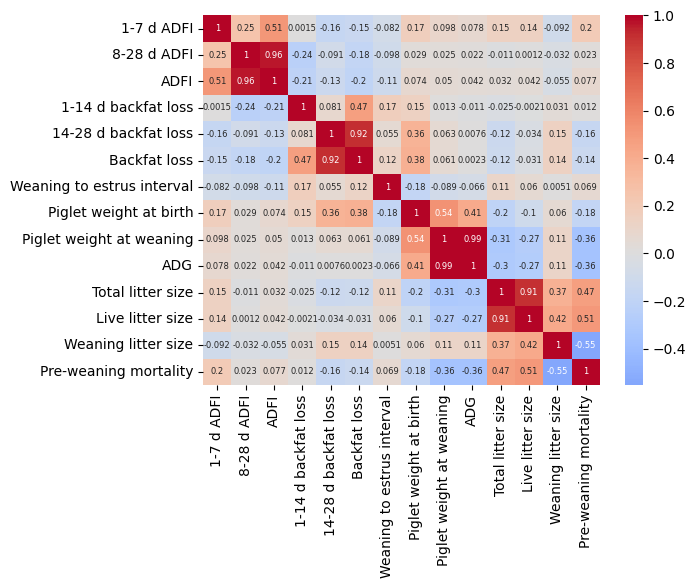

In [11]:
#查看各个指标之间的相关性
df_corr_m_x = df_m_x.corr()
sns.heatmap(df_corr_m_x, annot=True, cmap='coolwarm',center=0,annot_kws={"fontsize":6})
fig=plt.gcf()
plt.show()

In [12]:
#筛选指标
effect_list_m = ['NE',
                 'SID_Lys',
                 '编号',
                 'ADFI',
                 'Backfat loss',
                 'Weaning to estrus interval',
                 'Piglet weight at weaning',
                 'ADG',
                 'Weaning litter size',
                 'Pre-weaning mortality'
                ]

In [13]:
df_effect_m = df_m[effect_list_m]

In [14]:
columns_final = df_effect_m.columns.tolist()
del columns_final[0:3]

In [15]:
df_effect_m

,NE,SID_Lys,编号,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,1,1,1-1,2.8600,5,5,6.58,5.45,9,0.000000
1,1,1,1-2,2.8975,6,5,6.03,4.83,9,0.181818
2,1,1,1-3,2.9875,4,6,5.05,4.15,7,0.125000
3,1,1,1-4,2.9700,3,5,5.58,4.73,10,0.090909
4,1,1,1-5,2.9875,3,6,6.49,5.43,7,0.000000
5,1,1,1-6,3.0275,4,6,3.92,3.01,8,0.200000
6,1,1,1-7,2.9700,3,5,4.24,3.33,8,0.111111
7,1,1,1-8,2.9575,5,5,5.39,4.47,10,0.166667
8,1,2,2-1,2.9650,4,5,5.46,4.54,8,0.111111
9,1,2,2-2,2.9475,4,4,5.94,4.99,13,0.000000


In [16]:
x_m = df_m[effect_list_m[3:]]
x_m

,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,2.8600,5,5,6.58,5.45,9,0.000000
1,2.8975,6,5,6.03,4.83,9,0.181818
2,2.9875,4,6,5.05,4.15,7,0.125000
3,2.9700,3,5,5.58,4.73,10,0.090909
4,2.9875,3,6,6.49,5.43,7,0.000000
5,3.0275,4,6,3.92,3.01,8,0.200000
6,2.9700,3,5,4.24,3.33,8,0.111111
7,2.9575,5,5,5.39,4.47,10,0.166667
8,2.9650,4,5,5.46,4.54,8,0.111111
9,2.9475,4,4,5.94,4.99,13,0.000000


## 正向化和标准化——极差法

正向指标越大越好，负向指标越小越好，将负向指标转化为正向指标。除了发情间隔为负向指标外，其它均为正向指标。极差法可以同时进行正向化和标准化

In [17]:
#正向指标
x_m.loc[:,'ADFI'] = (x_m['ADFI'] - x_m['ADFI'].min())/(x_m['ADFI'].max() - x_m['ADFI'].min())
x_m.loc[:,'Piglet weight at weaning'] = (x_m['Piglet weight at weaning'] - x_m['Piglet weight at weaning'].min())/(x_m['Piglet weight at weaning'].max() - x_m['Piglet weight at weaning'].min())
x_m.loc[:,'ADG'] = (x_m['ADG'] - x_m['ADG'].min())/(x_m['ADG'].max() - x_m['ADG'].min())
x_m.loc[:,'Weaning litter size'] = (x_m['Weaning litter size'] - x_m['Weaning litter size'].min())/(x_m['Weaning litter size'].max() - x_m['Weaning litter size'].min())

In [18]:
#负向指标
x_m.loc[:,'Backfat loss'] = (x_m['Backfat loss'].max() - x_m['Backfat loss'])/(x_m['Backfat loss'].max() - x_m['Backfat loss'].min())
x_m.loc[:,'Weaning to estrus interval'] = (x_m['Weaning to estrus interval'].max() - x_m['Weaning to estrus interval'])/(x_m['Weaning to estrus interval'].max() - x_m['Weaning to estrus interval'].min())
x_m.loc[:,'Pre-weaning mortality'] = (x_m['Pre-weaning mortality'].max() - x_m['Pre-weaning mortality'])/(x_m['Pre-weaning mortality'].max() - x_m['Pre-weaning mortality'].min())

In [19]:
x_m

,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,0.000000,0.666667,0.75,0.773218,0.771363,0.555556,1.000000
1,0.208333,0.555556,0.75,0.654428,0.628176,0.555556,0.681818
2,0.708333,0.777778,0.50,0.442765,0.471132,0.333333,0.781250
3,0.611111,0.888889,0.75,0.557235,0.605081,0.666667,0.840909
4,0.708333,0.888889,0.50,0.753780,0.766744,0.333333,1.000000
5,0.930556,0.777778,0.50,0.198704,0.207852,0.444444,0.650000
6,0.611111,0.888889,0.75,0.267819,0.281755,0.444444,0.805556
7,0.541667,0.666667,0.75,0.516199,0.545035,0.666667,0.708333
8,0.583333,0.777778,0.75,0.531317,0.561201,0.444444,0.805556
9,0.486111,0.777778,1.00,0.634989,0.665127,1.000000,1.000000


## 非负平移

得到标准化矩阵后，由于后续计算需要使用ln ，所以需确保值大于0。对每个数加上0.000001

In [20]:
x_m = x_m + 0.000001

In [21]:
x_m

,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,0.000001,0.666668,0.750001,0.773219,0.771364,0.555557,1.000001
1,0.208334,0.555557,0.750001,0.654429,0.628177,0.555557,0.681819
2,0.708334,0.777779,0.500001,0.442766,0.471133,0.333334,0.781251
3,0.611112,0.888890,0.750001,0.557236,0.605082,0.666668,0.840910
4,0.708334,0.888890,0.500001,0.753781,0.766745,0.333334,1.000001
5,0.930557,0.777779,0.500001,0.198705,0.207853,0.444445,0.650001
6,0.611112,0.888890,0.750001,0.267820,0.281756,0.444445,0.805557
7,0.541668,0.666668,0.750001,0.516200,0.545036,0.666668,0.708334
8,0.583334,0.777779,0.750001,0.531318,0.561202,0.444445,0.805557
9,0.486112,0.777779,1.000001,0.634990,0.665128,1.000001,1.000001


## 计算评价指标的特征比重

第i个评价对象的第j项评价指标的特征比重,即占j项指标的比重

In [22]:
pij = x_m/x_m.sum()
pij

,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,2.175881e-08,1.234568e-02,1.449275e-02,1.790089e-02,1.764954e-02,1.666666e-02,2.019864e-02
1,4.533106e-03,1.028807e-02,1.449275e-02,1.515076e-02,1.437328e-02,1.666666e-02,1.377181e-02
2,1.541251e-02,1.440329e-02,9.661842e-03,1.025052e-02,1.077997e-02,1.000001e-02,1.578019e-02
3,1.329707e-02,1.646090e-02,1.449275e-02,1.290065e-02,1.384485e-02,1.999999e-02,1.698522e-02
4,1.541251e-02,1.646090e-02,9.661842e-03,1.745087e-02,1.754385e-02,1.000001e-02,2.019864e-02
5,2.024780e-02,1.440329e-02,9.661842e-03,4.600245e-03,4.755881e-03,1.333333e-02,1.312912e-02
6,1.329707e-02,1.646090e-02,1.449275e-02,6.200323e-03,6.446852e-03,1.333333e-02,1.627113e-02
7,1.178604e-02,1.234568e-02,1.449275e-02,1.195060e-02,1.247094e-02,1.999999e-02,1.430737e-02
8,1.269266e-02,1.440329e-02,1.449275e-02,1.230062e-02,1.284084e-02,1.333333e-02,1.627113e-02
9,1.057722e-02,1.440329e-02,1.932366e-02,1.470073e-02,1.521877e-02,2.999997e-02,2.019864e-02


## 计算评价指标的熵值

In [23]:
ei = -1/np.log(len(x_m)) * np.sum(pij * np.log(pij),axis = 0)
ei

ADFI                          0.986571
Backfat loss                  0.985676
Weaning to estrus interval    0.987246
Piglet weight at weaning      0.982706
ADG                           0.983378
Weaning litter size           0.981121
Pre-weaning mortality         0.979086
dtype: float64

## 计算评价指标的差异系数

In [24]:
di = 1-ei
di

ADFI                          0.013429
Backfat loss                  0.014324
Weaning to estrus interval    0.012754
Piglet weight at weaning      0.017294
ADG                           0.016622
Weaning litter size           0.018879
Pre-weaning mortality         0.020914
dtype: float64

## 计算评价指标的权重

In [25]:
w = di/di.sum()
w

ADFI                          0.117573
Backfat loss                  0.125409
Weaning to estrus interval    0.111664
Piglet weight at weaning      0.151412
ADG                           0.145534
Weaning litter size           0.165296
Pre-weaning mortality         0.183112
dtype: float64

## 层次分析法

In [26]:
matrix = np.array([[1,1/2,1,1/3,1/5,1/4,1/3],
                   [2,1,4/3,1/4,1/5,1/4,1/3],
                   [1,3/4,1,1/3,1/4,1/4,1/3],
                   [3,4,3,1,2/3,1,1],
                   [5,5,4,3/2,1,1,4/3],
                   [4,4,4,1,1,1,4/3],
                   [3,3,3,1,3/4,3/4,1]])

In [27]:
RI = (0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49)
input_matrix = np.array(matrix)
print(input_matrix.shape)

(7, 7)


In [28]:
n, n1 = input_matrix.shape

eigenvalues, eigenvectors = np.linalg.eig(input_matrix)

max_idx = np.argmax(eigenvalues)
max_eigen = eigenvalues[max_idx].real
eigen = eigenvectors[:, max_idx].real
eigen = eigen / eigen.sum()

CI = (max_eigen - n) / (n - 1)
CR = CI / RI[n]
print('最大特征值{:<5f},CR={:<5f}'.format(max_eigen, CR))
print('权重={}\n'.format(eigen))

最大特征值7.086064,CR=0.010173
权重=[0.05123478 0.06334322 0.05523666 0.18620974 0.25043496 0.22112633
 0.17241432]



## 计算组合权重值

In [29]:
w_ewm = pd.Series(w)

In [30]:
w_ewm

ADFI                          0.117573
Backfat loss                  0.125409
Weaning to estrus interval    0.111664
Piglet weight at weaning      0.151412
ADG                           0.145534
Weaning litter size           0.165296
Pre-weaning mortality         0.183112
dtype: float64

In [31]:
w_ahp = pd.Series(eigen,index=columns_final)

In [32]:
w_ahp

ADFI                          0.051235
Backfat loss                  0.063343
Weaning to estrus interval    0.055237
Piglet weight at weaning      0.186210
ADG                           0.250435
Weaning litter size           0.221126
Pre-weaning mortality         0.172414
dtype: float64

In [33]:
w_final = w_ewm.add(w_ahp)/2

In [34]:
w_final

ADFI                          0.084404
Backfat loss                  0.094376
Weaning to estrus interval    0.083450
Piglet weight at weaning      0.168811
ADG                           0.197985
Weaning litter size           0.193211
Pre-weaning mortality         0.177763
dtype: float64

## topsis法

In [35]:
x_m_topsis = x_m * w_final
x_m_topsis

,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,8.440393e-08,6.291734e-02,6.258780e-02,1.305278e-01,1.527181e-01,1.073398e-01,1.777632e-01
1,1.758424e-02,5.243113e-02,6.258780e-02,1.104747e-01,1.243692e-01,1.073398e-01,1.212023e-01
2,5.978620e-02,7.340355e-02,4.172523e-02,7.474367e-02,9.327699e-02,6.440398e-02,1.388776e-01
3,5.158026e-02,8.388976e-02,6.258780e-02,9.406760e-02,1.197969e-01,1.288078e-01,1.494828e-01
4,5.978620e-02,8.388976e-02,4.172523e-02,1.272464e-01,1.518036e-01,6.440398e-02,1.777632e-01
5,7.854263e-02,7.340355e-02,4.172523e-02,3.354360e-02,4.115172e-02,8.587190e-02,1.155462e-01
6,5.158026e-02,8.388976e-02,6.258780e-02,4.521087e-02,5.578338e-02,8.587190e-02,1.431982e-01
7,4.571888e-02,6.291734e-02,6.258780e-02,8.714016e-02,1.079086e-01,1.288078e-01,1.259157e-01
8,4.923571e-02,7.340355e-02,6.258780e-02,8.969237e-02,1.111093e-01,8.587190e-02,1.431982e-01
9,4.102977e-02,7.340355e-02,8.345037e-02,1.071933e-01,1.316851e-01,1.932115e-01,1.777632e-01


## 确定正、负理想解

正理想解，即所有指标均最好的虚拟对象；负理想解，即所有指标均最差的虚拟对象

In [36]:
#正理想解
best = x_m_topsis.max(axis = 0)
print(best)
#负理想解
worst = x_m_topsis.min(axis = 0)
print(worst)

ADFI                          0.084404
Backfat loss                  0.094376
Weaning to estrus interval    0.083450
Piglet weight at weaning      0.168811
ADG                           0.197985
Weaning litter size           0.193212
Pre-weaning mortality         0.177763
dtype: float64
ADFI                          8.440393e-08
Backfat loss                  9.437587e-08
Weaning to estrus interval    8.345029e-08
Piglet weight at weaning      1.688109e-07
ADG                           1.979846e-07
Weaning litter size           1.932113e-07
Pre-weaning mortality         1.777631e-07
dtype: float64


In [37]:
#计算对象与正理想解的距离
distance_best = np.linalg.norm(x_m_topsis - best,axis = 1)
df_effect_m.loc[:,'正理想解距离'] = distance_best
#计算对象与负理想解的距离
distance_worst = np.linalg.norm(x_m_topsis - worst,axis = 1)
df_effect_m.loc[:,'负理想解距离'] = distance_worst

C:\Windows\Temp\ipykernel_25512\2055203565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect_m.loc[:,'正理想解距离'] = distance_best
C:\Windows\Temp\ipykernel_25512\2055203565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect_m.loc[:,'负理想解距离'] = distance_worst


In [38]:
df_effect_m

,NE,SID_Lys,编号,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality,正理想解距离,负理想解距离
0,1,1,1-1,2.8600,5,5,6.58,5.45,9,0.000000,0.139419,0.302254
1,1,1,1-2,2.8975,6,5,6.03,4.83,9,0.181818,0.161416,0.246697
2,1,1,1-3,2.9875,4,6,5.05,4.15,7,0.125000,0.201749,0.220058
3,1,1,1-4,2.9700,3,5,5.58,4.73,10,0.090909,0.135167,0.275230
4,1,1,1-5,2.9875,3,6,6.49,5.43,7,0.000000,0.151356,0.295527
5,1,1,1-6,3.0275,4,6,3.92,3.01,8,0.200000,0.245971,0.191941
6,1,1,1-7,2.9700,3,5,4.24,3.33,8,0.111111,0.223243,0.215988
7,1,1,1-8,2.9575,5,5,5.39,4.47,10,0.166667,0.156657,0.248294
8,1,2,2-1,2.9650,4,5,5.46,4.54,8,0.111111,0.169220,0.244947
9,1,2,2-2,2.9475,4,4,5.94,4.99,13,0.000000,0.102536,0.334361


## 计算相对贴近度

In [39]:
df_effect_m.loc[:,'CE_topsis'] = distance_worst/(distance_best + distance_worst)
df_effect_m.to_excel('excel7.xlsx',sheet_name='sheet1',index=True)
df_effect_m

C:\Windows\Temp\ipykernel_25512\2820735952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect_m.loc[:,'CE_topsis'] = distance_worst/(distance_best + distance_worst)


,NE,SID_Lys,编号,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality,正理想解距离,负理想解距离,CE_topsis
0,1,1,1-1,2.8600,5,5,6.58,5.45,9,0.000000,0.139419,0.302254,0.684340
1,1,1,1-2,2.8975,6,5,6.03,4.83,9,0.181818,0.161416,0.246697,0.604483
2,1,1,1-3,2.9875,4,6,5.05,4.15,7,0.125000,0.201749,0.220058,0.521702
3,1,1,1-4,2.9700,3,5,5.58,4.73,10,0.090909,0.135167,0.275230,0.670643
4,1,1,1-5,2.9875,3,6,6.49,5.43,7,0.000000,0.151356,0.295527,0.661307
5,1,1,1-6,3.0275,4,6,3.92,3.01,8,0.200000,0.245971,0.191941,0.438310
6,1,1,1-7,2.9700,3,5,4.24,3.33,8,0.111111,0.223243,0.215988,0.491741
7,1,1,1-8,2.9575,5,5,5.39,4.47,10,0.166667,0.156657,0.248294,0.613146
8,1,2,2-1,2.9650,4,5,5.46,4.54,8,0.111111,0.169220,0.244947,0.591420
9,1,2,2-2,2.9475,4,4,5.94,4.99,13,0.000000,0.102536,0.334361,0.765309


In [40]:
#查看每个处理组的平均综合指标
n = 8
sum_CE_data = [df_effect_m['CE_topsis'][i:i+n].sum() for i in range(0, len(df_effect_m['CE_topsis']), n)]
sum_CE_data = [sum_CE_data[i]/8 for i in range(len(sum_CE_data))]
result1 = pd.Series(sum_CE_data)
result1.to_excel('excel3.xlsx',sheet_name='sheet1',index=True)
print(result1)

0    0.585709
1    0.643594
2    0.551873
3    0.545979
4    0.580672
5    0.663757
6    0.559852
7    0.592487
8    0.593368
dtype: float64


In [41]:
#查看每个处理组的平均综合指标
n = 8
sum_zheng_data = [df_effect_m['正理想解距离'][i:i+n].sum() for i in range(0, len(df_effect_m['正理想解距离']), n)]
sum_zheng_data = [sum_zheng_data[i]/8 for i in range(len(sum_zheng_data))]
result2 = pd.Series(sum_zheng_data)
result2.to_excel('excel4.xlsx',sheet_name='sheet1',index=True)
print(result2)

0    0.176872
1    0.148830
2    0.192912
3    0.197591
4    0.177940
5    0.145423
6    0.188875
7    0.179782
8    0.175173
dtype: float64


In [42]:
#查看每个处理组的平均综合指标
n = 8
sum_fu_data = [df_effect_m['负理想解距离'][i:i+n].sum() for i in range(0, len(df_effect_m['负理想解距离']), n)]
sum_fu_data = [sum_fu_data[i]/8 for i in range(len(sum_fu_data))]
result3 = pd.Series(sum_fu_data)
result3.to_excel('excel5.xlsx',sheet_name='sheet1',index=True)
print(result3)

0    0.249499
1    0.268949
2    0.240068
3    0.237650
4    0.245649
5    0.285921
6    0.234825
7    0.259736
8    0.253841
dtype: float64


## 灰色关联度分析

In [43]:
data_list = ['CE_topsis',
             'ADFI',
             'Backfat loss',
             'Weaning to estrus interval',
             'Piglet weight at weaning',
             'ADG',
             'Weaning litter size',
             'Pre-weaning mortality'
            ]

In [44]:
data = df_effect_m[data_list]

In [45]:
data

,CE_topsis,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,0.684340,2.8600,5,5,6.58,5.45,9,0.000000
1,0.604483,2.8975,6,5,6.03,4.83,9,0.181818
2,0.521702,2.9875,4,6,5.05,4.15,7,0.125000
3,0.670643,2.9700,3,5,5.58,4.73,10,0.090909
4,0.661307,2.9875,3,6,6.49,5.43,7,0.000000
5,0.438310,3.0275,4,6,3.92,3.01,8,0.200000
6,0.491741,2.9700,3,5,4.24,3.33,8,0.111111
7,0.613146,2.9575,5,5,5.39,4.47,10,0.166667
8,0.591420,2.9650,4,5,5.46,4.54,8,0.111111
9,0.765309,2.9475,4,4,5.94,4.99,13,0.000000


In [46]:
print(data.mean())

CE_topsis                     0.590810
ADFI                          2.974896
Backfat loss                  4.250000
Weaning to estrus interval    5.125000
Piglet weight at weaning      5.777639
ADG                           4.738333
Weaning litter size           8.166667
Pre-weaning mortality         0.178506
dtype: float64


In [47]:
data = data.apply(lambda x: x/x.mean(), axis=0)

In [48]:
data

,CE_topsis,ADFI,Backfat loss,Weaning to estrus interval,Piglet weight at weaning,ADG,Weaning litter size,Pre-weaning mortality
0,1.158307,0.961378,1.176471,0.975610,1.138874,1.150193,1.102041,0.000000
1,1.023142,0.973984,1.411765,0.975610,1.043679,1.019346,1.102041,1.018556
2,0.883029,1.004237,0.941176,1.170732,0.874059,0.875835,0.857143,0.700257
3,1.135124,0.998354,0.705882,0.975610,0.965792,0.998241,1.224490,0.509278
4,1.119323,1.004237,0.705882,1.170732,1.123296,1.145973,0.857143,0.000000
5,0.741879,1.017683,0.941176,1.170732,0.678478,0.635244,0.979592,1.120412
6,0.832316,0.998354,0.705882,0.975610,0.733864,0.702779,0.979592,0.622451
7,1.037806,0.994152,1.176471,0.975610,0.932907,0.943370,1.224490,0.933676
8,1.001033,0.996674,0.941176,0.975610,0.945023,0.958143,0.979592,0.622451
9,1.295355,0.990791,0.941176,0.780488,1.028102,1.053113,1.591837,0.000000


In [49]:
# 参考数列
std = data.iloc[:,0]
print(std)

0     1.158307
1     1.023142
2     0.883029
3     1.135124
4     1.119323
5     0.741879
6     0.832316
7     1.037806
8     1.001033
9     1.295355
10    1.089897
11    0.987943
12    1.179476
13    1.033937
14    0.972462
15    1.154627
16    0.450933
17    0.984056
18    0.884672
19    1.163206
20    1.055442
21    0.718115
22    1.054345
23    1.161992
24    0.891592
25    1.021966
26    0.773428
27    1.211434
28    0.677616
29    1.017191
30    0.831371
31    0.968358
32    1.179329
33    0.968284
34    0.945829
35    1.153886
36    0.986518
37    0.796489
38    0.897473
39    0.934912
40    1.227597
41    1.097519
42    1.228722
43    0.936644
44    0.715554
45    1.385970
46    1.183528
47    1.212223
48    1.090741
49    0.460119
50    1.209579
51    0.898143
52    1.063270
53    1.090058
54    1.039441
55    0.729452
56    0.698007
57    1.283328
58    0.885556
59    0.755983
60    1.300620
61    1.230571
62    1.010014
63    0.858625
64    0.663277
65    1.388168
66    0.70

In [50]:
# 比较数列
ce = data.drop('CE_topsis',axis=1)
print(ce)
n = ce.shape[0]
m = ce.shape[1]
print(n,m)

        ADFI  Backfat loss  Weaning to estrus interval  \
0   0.961378      1.176471                    0.975610   
1   0.973984      1.411765                    0.975610   
2   1.004237      0.941176                    1.170732   
3   0.998354      0.705882                    0.975610   
4   1.004237      0.705882                    1.170732   
5   1.017683      0.941176                    1.170732   
6   0.998354      0.705882                    0.975610   
7   0.994152      1.176471                    0.975610   
8   0.996674      0.941176                    0.975610   
9   0.990791      0.941176                    0.780488   
10  0.979026      1.411765                    1.365854   
11  0.976505      1.176471                    1.170732   
12  0.996674      0.705882                    0.975610   
13  0.994152      0.941176                    1.170732   
14  0.996674      0.941176                    0.975610   
15  0.996674      0.941176                    1.170732   
16  0.991631  

In [51]:
# 与参考数列比较，相减
grap = np.zeros([n,m])
for i in range(m):
    for j in range(n):
        grap[j,i] = abs(ce.iloc[j,i] - std[j])
print(pd.DataFrame(grap))

           0         1         2         3         4         5         6
0   0.196929  0.018163  0.182697  0.019434  0.008114  0.056266  1.158307
1   0.049159  0.388622  0.047533  0.020536  0.003797  0.078898  0.004586
2   0.121208  0.058148  0.287703  0.008969  0.007193  0.025886  0.182772
3   0.136770  0.429242  0.159515  0.169332  0.136883  0.089365  0.625846
4   0.115086  0.413440  0.051409  0.003974  0.026650  0.262180  1.119323
5   0.275804  0.199298  0.428853  0.063401  0.106634  0.237713  0.378533
6   0.166038  0.126434  0.143294  0.098452  0.129537  0.147276  0.209865
7   0.043653  0.138665  0.062196  0.104898  0.094436  0.186684  0.104129
8   0.004359  0.059856  0.025423  0.056010  0.042890  0.021441  0.378582
9   0.304564  0.354179  0.514867  0.267253  0.242242  0.296482  1.295355
10  0.110871  0.321868  0.275956  0.020256  0.059999  0.134593  0.580619
11  0.011438  0.188528  0.182789  0.049843  0.065677  0.236547  0.054266
12  0.182802  0.473594  0.203866  0.123681  0.07993

In [52]:
# 取出矩阵中的最大值和最小值
mmax = np.amax(grap)
mmin = np.amin(grap)
ρ = 0.5 # 灰色分辨系数
print(mmax,mmin)

2.7410568259625916 0.0008268516092351241


In [53]:
grap = pd.DataFrame(grap)

In [54]:
# 计算值
for i in range(grap.shape[1]):
    grap.iloc[:,i] = (mmin+ρ*mmax)/(grap.iloc[:,i]+ρ*mmax)
# 求均值，得到灰色关联值
RT = grap.mean()
print(grap)
print(RT)

           0         1         2         3         4         5         6
0   0.874892  0.987516  0.882908  0.986614  0.994715  0.961144  0.542287
1   0.965956  0.779555  0.967064  0.985831  0.997839  0.946136  0.997266
2   0.919301  0.959878  0.826999  0.994097  0.995379  0.982055  0.882866
3   0.909810  0.761961  0.896285  0.890571  0.909742  0.939353  0.686923
4   0.923090  0.768710  0.964427  0.997711  0.981518  0.839927  0.550778
5   0.832976  0.873571  0.762126  0.956362  0.928371  0.852705  0.784052
6   0.892480  0.916092  0.905889  0.933542  0.914197  0.903513  0.867730
7   0.969717  0.908668  0.957166  0.929463  0.936102  0.880647  0.929948
8   0.997431  0.958732  0.982381  0.961317  0.970240  0.985191  0.784030
9   0.818674  0.795124  0.727357  0.837325  0.850310  0.822644  0.514409
10  0.925716  0.810304  0.832899  0.986030  0.958636  0.911126  0.702845
11  0.992322  0.879606  0.882856  0.965490  0.954846  0.853323  0.962493
12  0.882848  0.743636  0.871037  0.917780  0.94546